In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/flipkart_sales.csv')
df

,Order ID,Product Name,Category,Price (INR),Quantity Sold,Total Sales (INR),Order Date,Payment Method,Customer Rating
0,ORD00001,Educational Book,Books,49069.56,2,98139.12,2024-09-12,Debit Card,3.5
1,ORD00002,Jeans,Clothing,12755.85,4,51023.40,2024-12-18,UPI,3.9
2,ORD00003,Face Cream,Beauty,11092.19,4,44368.76,2024-05-18,Debit Card,4.4
3,ORD00004,Smartwatch,Electronics,32657.81,1,32657.81,2024-11-08,Debit Card,3.2
4,ORD00005,Cookware Set,Home & Kitchen,26590.08,3,79770.24,2024-12-27,UPI,3.1
...,...,...,...,...,...,...,...,...,...
995,ORD00996,Smartphone,Electronics,28995.81,3,86987.43,2025-01-13,COD,5.0
996,ORD00997,Perfume,Beauty,32799.51,2,65599.02,2024-12-18,Wallet,2.4
997,ORD00998,Face Cream,Beauty,40840.80,1,40840.80,2024-07-26,UPI,3.1
998,ORD00999,Cookware Set,Home & Kitchen,34741.79,4,138967.16,2024-10-02,Net Banking,3.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order ID           1000 non-null   object 
 1   Product Name       1000 non-null   object 
 2   Category           1000 non-null   object 
 3   Price (INR)        1000 non-null   float64
 4   Quantity Sold      1000 non-null   int64  
 5   Total Sales (INR)  1000 non-null   float64
 6   Order Date         1000 non-null   object 
 7   Payment Method     1000 non-null   object 
 8   Customer Rating    1000 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 70.4+ KB


In [ ]:
df.drop_duplicates()
df['Order Date'] = pd.to_datetime(df['Order Date'])

**1) Total Sales by Category**

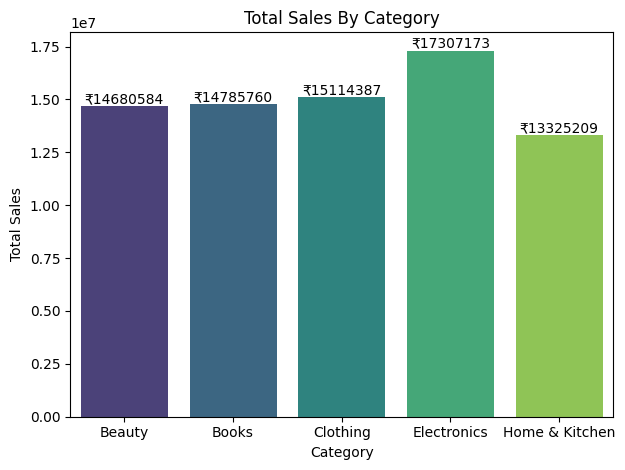

In [3]:
product_sales=df.groupby('Category')['Total Sales (INR)'].sum()

a=sns.barplot(x=product_sales.index,
              y=product_sales.values,
              hue=product_sales.index,
              palette='viridis',
              legend=False)

for i in a.containers:
  a.bar_label(i,fmt='₹%.0f')

plt.title('Total Sales By Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

**2) Daily Sales Trend**

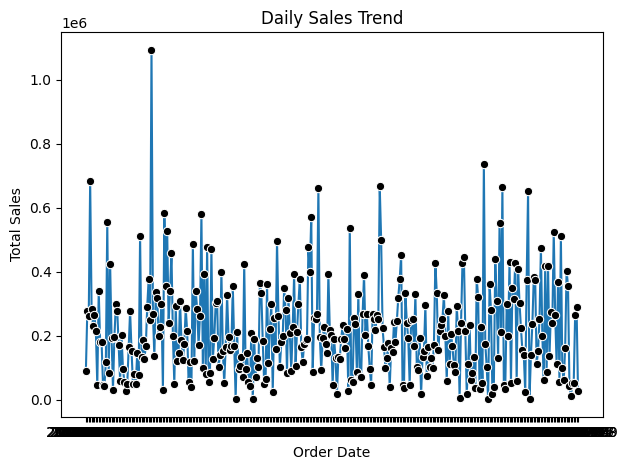

In [4]:
daily_sales=df.groupby('Order Date')['Total Sales (INR)'].sum()
sns.lineplot(x=daily_sales.index,y=daily_sales.values,marker='o',markerfacecolor='black')
plt.title('Daily Sales Trend')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


**3) Sales by Payment Method**

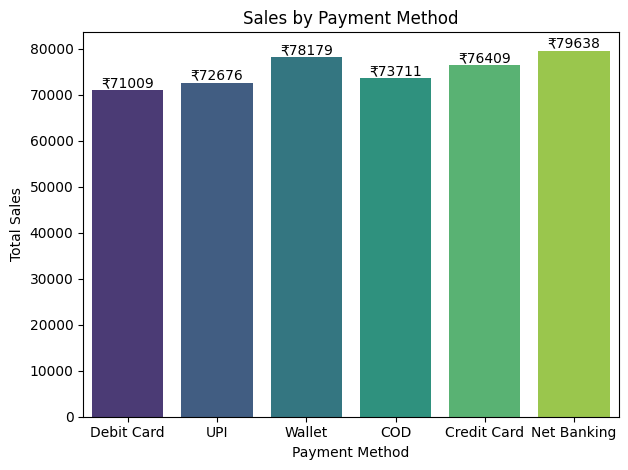

In [5]:
a=sns.barplot(data=df,x='Payment Method',y='Total Sales (INR)',errorbar=None,hue='Payment Method',palette='viridis')

for i in a.containers:
  a.bar_label(i,fmt='₹%.0f')

plt.title('Sales by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


**4) Customer Rating Distribution**

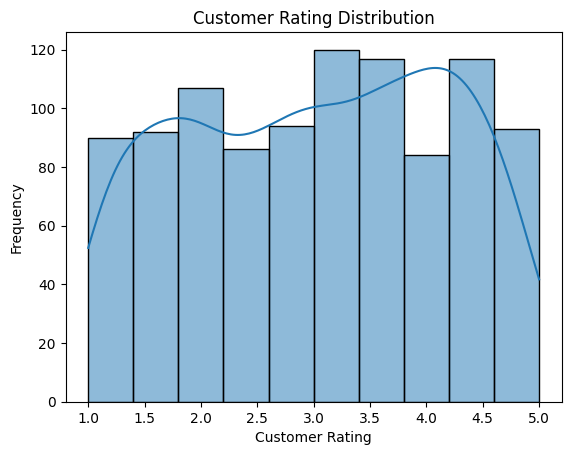

In [ ]:
sns.histplot(data=df,x='Customer Rating',bins=10,kde=True)
plt.title('Customer Rating Distribution')
plt.xlabel('Customer Rating')
plt.ylabel('Frequency')
plt.show()

**5) Relation: Price vs Customer Rating**

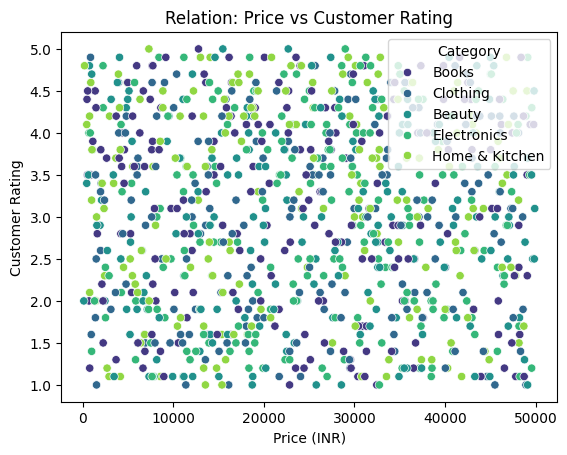

In [ ]:
sns.scatterplot(data=df,x='Price (INR)',y='Customer Rating',hue='Category',palette='viridis')
plt.title('Relation: Price vs Customer Rating')
plt.show()

**6) Monthly Sales Trend**

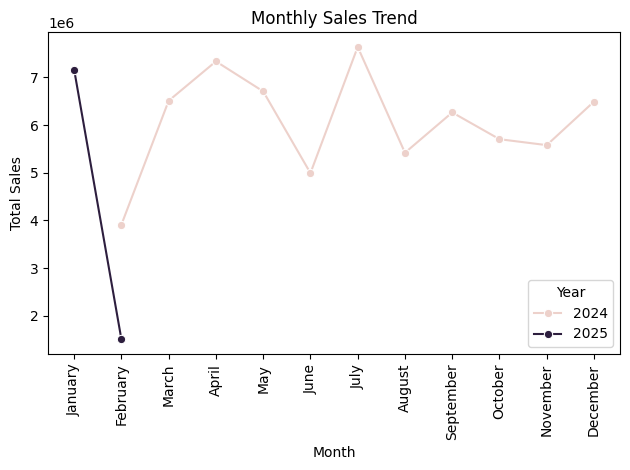

In [ ]:
import calendar

df['Month'] = df['Order Date'].dt.month_name()
df['Year'] = df['Order Date'].dt.year
df['Month_Num'] = df['Order Date'].dt.month

monthly_sales = df.groupby(['Month', 'Year', 'Month_Num'])['Total Sales (INR)'].sum().reset_index()
monthly_sales = monthly_sales.sort_values('Month_Num')

sns.lineplot(data=monthly_sales, x='Month', y='Total Sales (INR)', hue='Year', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

**7) Correlation Heatmap**

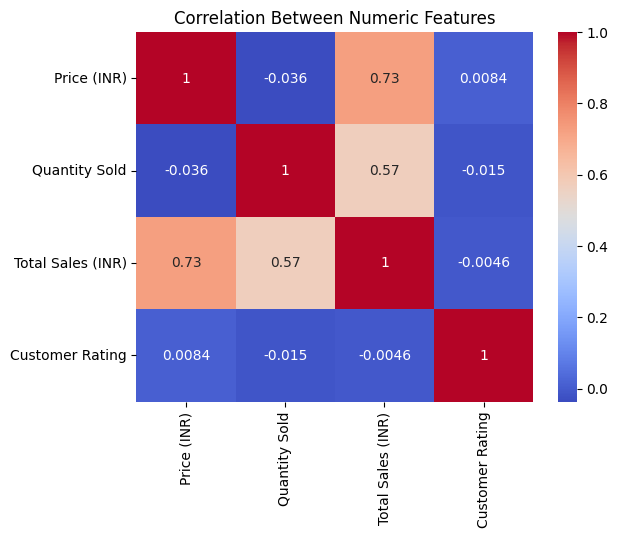

In [ ]:
sns.heatmap(df[['Price (INR)','Quantity Sold','Total Sales (INR)','Customer Rating']].corr(),annot=True, cmap='coolwarm')
plt.title('Correlation Between Numeric Features')
plt.show()

**8) Pairwise Relationships**

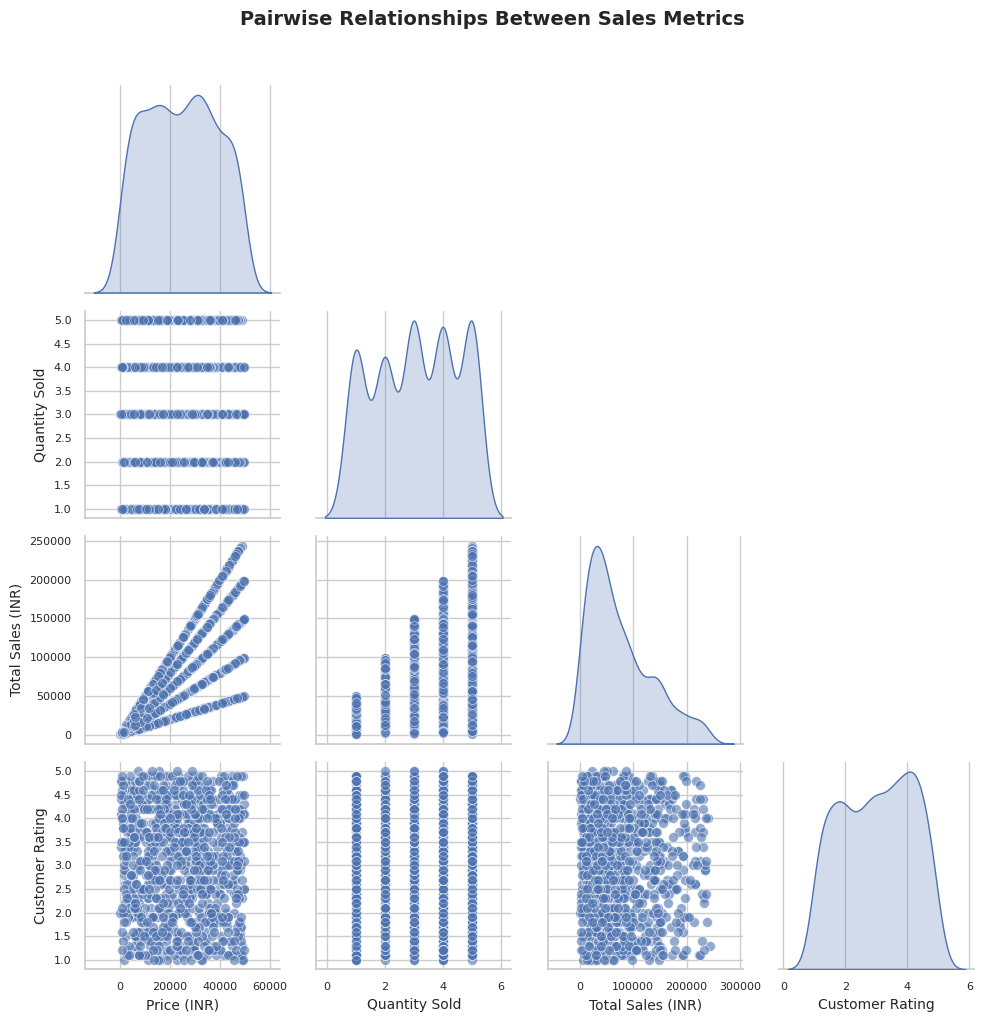

In [ ]:
sns.set_theme(style='whitegrid', context='notebook')

g = sns.pairplot(
    df[['Price (INR)', 'Quantity Sold', 'Total Sales (INR)', 'Customer Rating']],
    diag_kind='kde',
    corner=True,
    plot_kws={'alpha':0.6, 's':50, 'edgecolor':'w'}
)

g.fig.suptitle('Pairwise Relationships Between Sales Metrics', fontsize=14, weight='bold', y=1.02)
for ax in g.axes.flatten():
    if ax:
        ax.set_xlabel(ax.get_xlabel(), fontsize=10)
        ax.set_ylabel(ax.get_ylabel(), fontsize=10)
        ax.tick_params(axis='both', labelsize=8)

plt.tight_layout()
plt.show()